In [10]:
import pandas as pd
import numpy as np
from datetime import datetime

# Summarizing, Aggregating & Grouping

In [11]:
energy = pd.read_csv('../data/energy/PJM_Load_hourly.csv', parse_dates=True, index_col=0)

## Exercise:

- Find the day of the week that averages the highest consumption

- Find the time of day that averages the lowest consumption.
    - Has this changed over the years?
    

- Is average consumption rising, falling, or staying the same over the years?
- What is the %age difference in consumption on average between April and June?

- Find the day of the week that averages the highest consumption

In [12]:
#solution 1
print(f'Day of highest consumption: {energy.groupby(energy.index.weekday).mean().idxmax().values[0]:1.0f}')

Day of highest consumption: 1


In [13]:
#solution 2
day_av = energy.groupby(energy.index.weekday).mean()
day_av_hi = day_av.sort_values('PJM_Load_MW', ascending=False).index[0]
print(day_av_hi)
day_av_hi = datetime.strftime(datetime.strptime(str(day_av_hi), '%w'), '%A')
day_av_hi

1


'Monday'

In [14]:
#solution 3
listwday = []
for iwday in range(7):
    avwday = energy.loc[energy.index.weekday == iwday].mean()
    listwday.append(avwday)
maxwday = np.asarray(listwday).argmax(axis=0)
print(maxwday)

[1]


- Find the time of day that averages the lowest consumption.
    - Has this changed over the years?

In [15]:
#Time of the day with lowest consumption:
print(f'Time of the day of lowest consumption: {energy.groupby(energy.index.hour).mean().idxmin().values[0]:1.0f}h')

Time of the day of lowest consumption: 4h


In [16]:
#Over the years:
time_of_day = energy.groupby([energy.index.year, energy.index.hour]).mean()
time_of_day.groupby(level=0).idxmin()

,PJM_Load_MW
Datetime,
1998,"(1998, 4)"
1999,"(1999, 4)"
2000,"(2000, 4)"
2001,"(2001, 4)"
2002,"(2002, 0)"


In [17]:
#Over the years (solution 2)
energy_mean_yh = energy.groupby([energy.index.year,energy.index.hour]).mean()
energy_mean_yh.index.set_names('year', level=0, inplace=True)
energy_mean_yh.index.set_names('weekday', level=1, inplace=True)
energy_mean_yh.reset_index(inplace=True)
#print(energy_mean_yh)
for i in range(1998,2003):
    id = energy_mean_yh.loc[energy_mean_yh.year==i].loc[:,'PJM_Load_MW'].idxmin()
    print('In Year', i, 'Minimum at', energy_mean_yh.iloc[id].loc['weekday'], 'h')

In Year 1998 Minimum at 4.0 h
In Year 1999 Minimum at 4.0 h
In Year 2000 Minimum at 4.0 h
In Year 2001 Minimum at 4.0 h
In Year 2002 Minimum at 0.0 h


- Is average consumption rising, falling, or staying the same over the years?

In [18]:
#solution 1
energy = pd.read_csv('./data/energy/PJM_Load_hourly.csv', parse_dates=True, index_col=0)
energy_year = energy.groupby(energy.index.year).mean()
print(energy_year)
plt.plot(energy_year)

FileNotFoundError: [Errno 2] No such file or directory: './data/energy/PJM_Load_hourly.csv'

<AxesSubplot: xlabel='Year', ylabel='Average Consumption'>

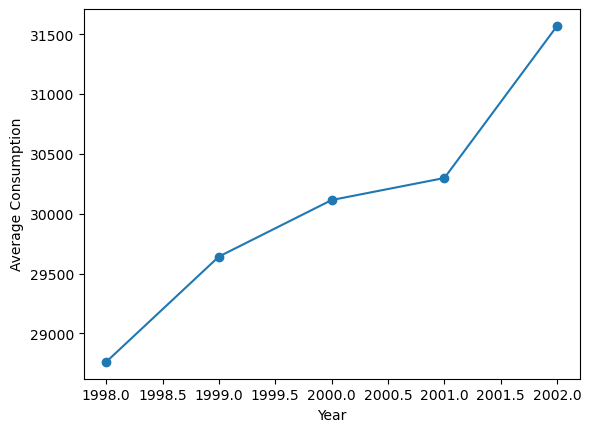

In [19]:
#solution 2
energy.groupby(energy.index.year).mean().plot(ylabel='Average Consumption',legend=False,xlabel='Year',marker='o')

- What is the percentage difference in consumption on average between April and June?

In [20]:
avg_monthly_consumption = energy.groupby(energy.index.month).mean()
avg_monthly_consumption

,PJM_Load_MW
Datetime,
1,31943.791312
2,30577.296569
3,28898.505824
4,26104.898087
5,26983.842742
6,31703.028125
7,33573.780242
8,34012.357191
9,29433.188542


In [21]:
avg_april_consumption = avg_monthly_consumption.loc[4]
avg_april_consumption

PJM_Load_MW    26104.898087
Name: 4, dtype: float64

In [22]:
avg_june_consumption = avg_monthly_consumption.loc[6]
avg_june_consumption

PJM_Load_MW    31703.028125
Name: 6, dtype: float64

In [155]:
percentage_diff = ((avg_june_consumption - avg_april_consumption)/ avg_april_consumption)*100
percentage_diff

PJM_Load_MW    21.44475
dtype: float64